In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
mov= pd.read_csv('my_movies.csv')
mov

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
mov.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [6]:
mov.shape

(10, 15)

In [7]:
mov.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [9]:
mov.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

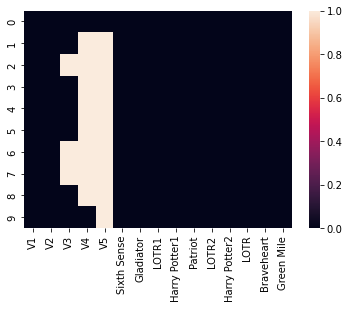

In [31]:
sns.heatmap(mov.isnull())
plt.show()

In [10]:
mov_1 = mov.iloc[:,0:5]

In [11]:
mov_1

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,NaN,NaN
2,LOTR1,LOTR2,NaN,NaN,NaN
3,Gladiator,Patriot,Sixth Sense,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN
5,Gladiator,Patriot,Sixth Sense,NaN,NaN
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN
7,Gladiator,Patriot,NaN,NaN,NaN
8,Gladiator,Patriot,Sixth Sense,NaN,NaN
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN


In [12]:
df1 = pd.get_dummies(mov_1)

In [14]:
df1

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [15]:
mov_2 = mov.iloc[:,5:15]

In [16]:
mov_2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [17]:
#Apriori Algorithm
#Keeping Min Support for Apriori as 10%
freq_items1 = apriori(mov_2, min_support=0.10, use_colnames=True)
freq_items1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [18]:
#Using Lift as Metric, keeping min value as 1 
rules1 = association_rules(freq_items1, metric="lift", min_threshold=1)
rules1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
202,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
187,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(Sixth Sense, Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
129,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
203,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
36,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
44,"(Sixth Sense, Gladiator)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


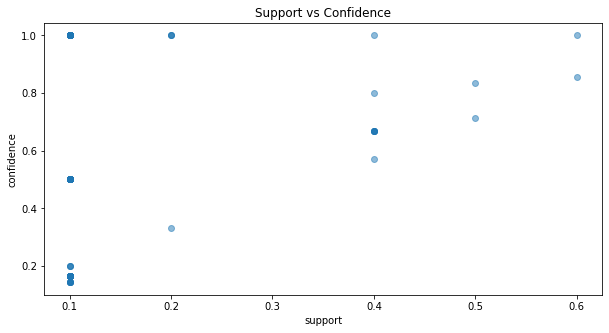

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [20]:
#Using Lift as Metric, keeping min value as 10
rules2 = association_rules(freq_items1, metric="lift", min_threshold=10)
rules2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
31,"(Harry Potter1, Sixth Sense, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
23,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
24,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
25,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
26,"(Sixth Sense, LOTR2, LOTR1)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
27,"(LOTR2, LOTR1, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
28,"(Sixth Sense, LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
29,"(Sixth Sense, LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
30,"(LOTR2, Harry Potter1, Green Mile)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [21]:
#Using Confidence as Metric, keeping min value as 75%
rules3 = association_rules(freq_items1, metric="confidence", min_threshold=0.75)
rules3.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
127,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR2, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
101,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
65,"(LOTR2, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
94,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
93,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
5,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
13,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
12,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


In [22]:
#Using Confidence as Metric, keeping min value as 100%
rules4 = association_rules(freq_items1, metric="confidence", min_threshold=1)
rules4.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,"(LOTR2, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
75,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
91,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
90,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
88,"(Sixth Sense, LOTR2)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
51,"(LOTR, Sixth Sense, Green Mile)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf


In [23]:
#Using Supprort as Metric, keeping min value as 50%
rules5 = association_rules(freq_items1, metric="support", min_threshold=0.50)
rules5.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


In [24]:
#Keeping Min Support for Apriori as 20%
freq_items2 = apriori(mov_2, min_support=0.20, use_colnames=True)
freq_items2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [25]:
#Using Lift as Metric, keeping min value as 1 
rules6 = association_rules(freq_items2, metric="lift", min_threshold=1)
rules6.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
10,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
15,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


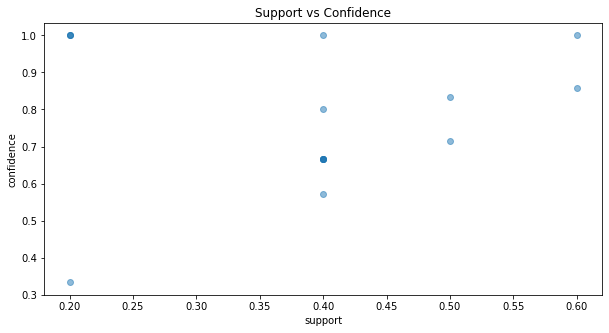

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(rules6['support'], rules6['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [27]:
#Using Confidence as Metric, keeping min value as 100%
rules7 = association_rules(freq_items2, metric="confidence", min_threshold=1)
rules7.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
3,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


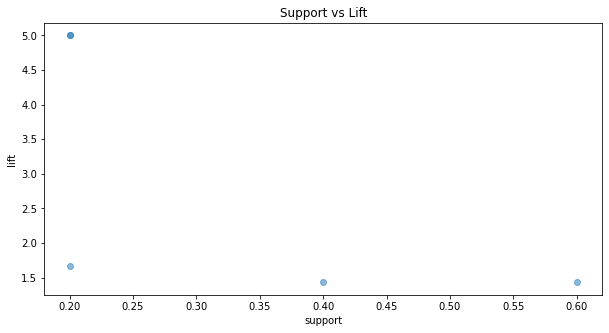

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(rules7['support'], rules7['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [29]:
#Using Confidence as Metric, keeping min value as 75%
rules7 = association_rules(freq_items2, metric="confidence", min_threshold=0.75)
rules7.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
6,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8


In [30]:
#Using Supprort as Metric, keeping min value as 50%
rules8 = association_rules(freq_items2, metric="support", min_threshold=0.50)
rules8.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


SyntaxError: unmatched ']' (4050804687.py, line 1)